# Mid Semester Project - DEEP Reinforcements Learning
### Part 3: Inference

Student: Jonathan Mendelson 308564293


##### Imports

In [15]:
# general utils
import os

# torch
import torch

# my imports
from src.display_utils import embed_mp4, launch_tb, plot_metrics
from src.utils import record_agent_video, build_envs, evaluate_agent
from src.cnn_policy import CNNPolicyNetwork

# notebook setup
%load_ext autoreload
%autoreload 2

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initializations
Paths and Env:

In [3]:
content_path = os.path.join('inference')

# env init
env_2_rooms, env_4_rooms, env_6_rooms = build_envs()

In [46]:
env_4_rooms.unwrapped.max_steps

120

Agent init:

In [9]:
# REINFORCE Models
RF_2Room_path = 'experiments\RF_02\Mar-06_22-19-08\models\RF_2Room_100_10000.pt'
RF_4Room_path = 'experiments\RF_02\Mar-06_22-19-08\models\RF_4Room_2000_5000_4.pt'
RF_6Room_path = 'experiments\RF_02\Mar-06_22-19-08\models\RF_6Room_200_5000_4.pt'

RF_2Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n)
RF_4Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n)
RF_6Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n)

RF_2Room_model.load_state_dict(torch.load(RF_2Room_path, map_location = device))
RF_4Room_model.load_state_dict(torch.load(RF_4Room_path, map_location = device))
RF_6Room_model.load_state_dict(torch.load(RF_6Room_path, map_location = device))

RF_2Room_model.eval();
RF_4Room_model.eval();
RF_6Room_model.eval();

## Two Room Environemnt
In this section we will evaluate the preformance of the agent on the two room environmets. The agents we will use:
| Algorithm      | Training Episodes  | Env Max Steps|
|----------------|----------------|------|
| REINFORCE      | 10K         | 20|
| A2C         | Step 2         |20

In [ ]:
RF_metrics = evaluate_agent(RF_2Room_model, env_2_rooms, num_episodes=100)

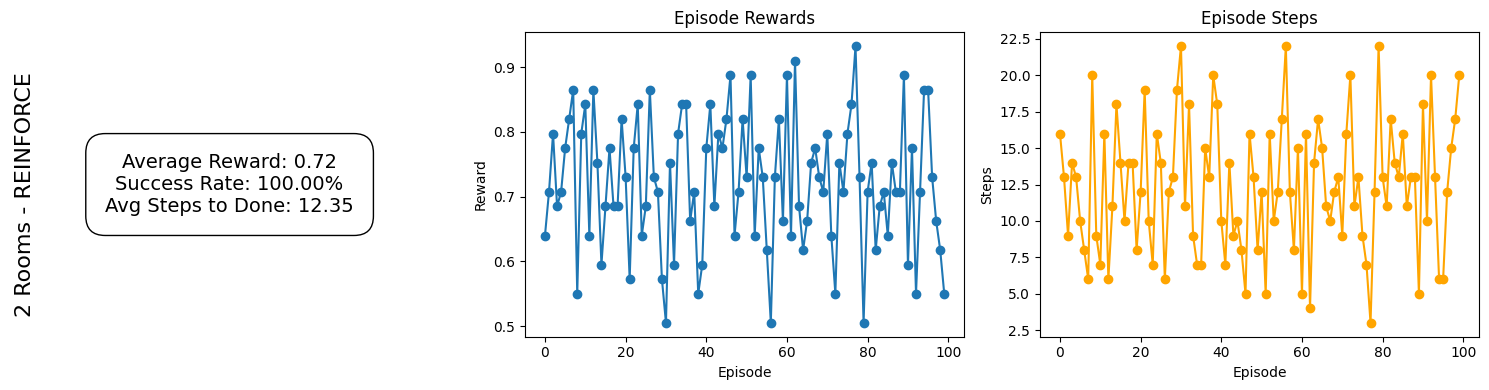

In [27]:
plot_metrics(RF_metrics, model_name='2 Rooms - REINFORCE')

### Video Example:
REINFORCE Agent:

In [36]:
video_path = os.path.join(content_path, '2Room_RF.mp4')
vid = record_agent_video(RF_2Room_model, env_2_rooms, video_path)
embed_mp4((video_path))

A2C Agent:

In [ ]:
# TODO

## Four Room Environemnt
In this section we will evaluate the preformance of the agent on the 4 room environmet. The agents we will use:
| Algorithm      | Training Episodes  | Env Max Steps|
|----------------|----------------|------|
| REINFORCE      | 10k        | 500|
| A2C         | Step 2         |

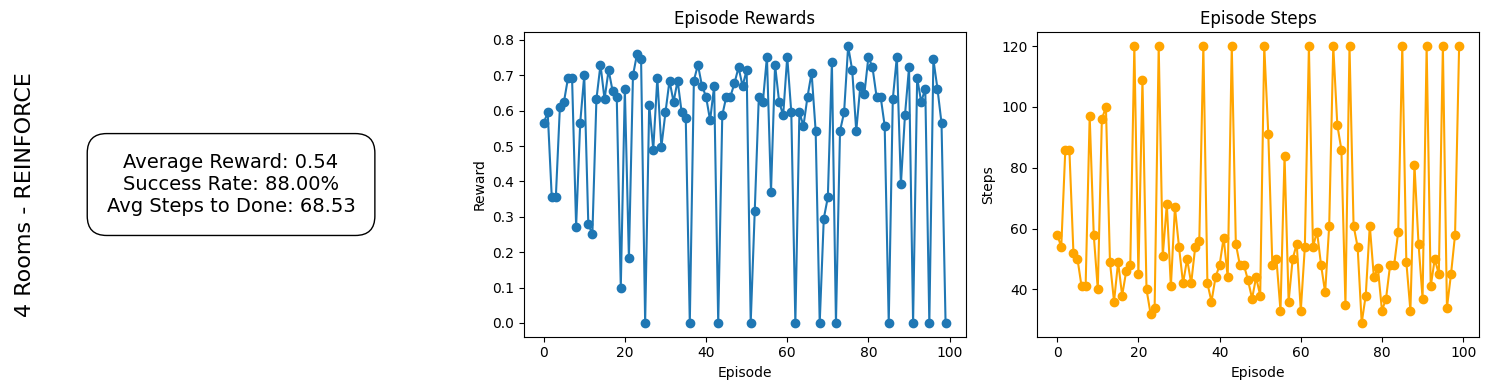

In [37]:
RF_metrics = evaluate_agent(RF_4Room_model, env_4_rooms, num_episodes=100)
plot_metrics(RF_metrics, model_name='4 Rooms - REINFORCE')

In [38]:
video_path = os.path.join(content_path, '4Room_RF.mp4')
vid = record_agent_video(RF_4Room_model, env_4_rooms, video_path)
embed_mp4((video_path))

## Six Room Environemnt
In this section we will evaluate the preformance of the agent on the six room environmet. The agents we will use:
| Algorithm      | Training Episodes  | Env Max Steps|
|----------------|----------------|------|
| REINFORCE      | 15K         | 500|
| A2C         | Step 2         |

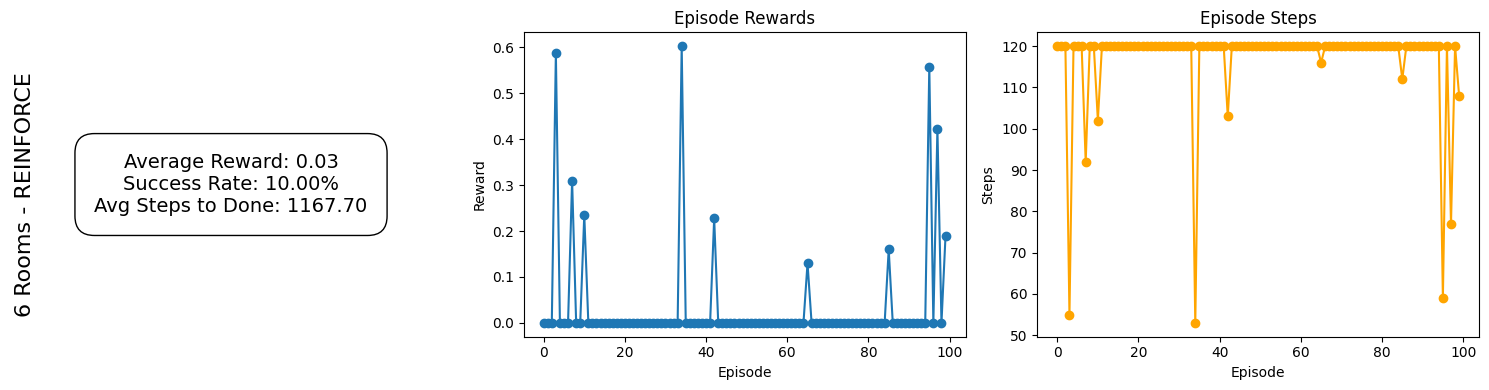

In [40]:
RF_metrics = evaluate_agent(RF_6Room_model, env_6_rooms, num_episodes=100)
plot_metrics(RF_metrics, model_name='6 Rooms - REINFORCE')

In [39]:
video_path = os.path.join(content_path, '6Room_RF.mp4')
vid = record_agent_video(RF_4Room_model, env_4_rooms, video_path)
embed_mp4((video_path))